# Chapter 9, demo 1

Bayesian data analysis

Prof Gelman has a jar of coins. He promises that if the students guess how many coins there are, they will get all the coins in the jar. Students discuss and guess different values. Based on these they eventually present their uncertainty about the number of coins as a normal distribution N(160,40). What value they should guess?

In [ ]:
import numpy as np
import preliz as pz

import matplotlib.pyplot as plt
pz.style.use('preliz-doc')

In [2]:
# distribution
m = 160     # mean
s = 40      # std

x = np.arange(m-3*s, m+3*s+1)
dist = pz.Normal(m, s)
px = dist.pdf(x)
xpx = x * px

If students just want to guess right, and they do not care how much money they'll get they should guess the most probable value, i.e. the mode of the distribution.

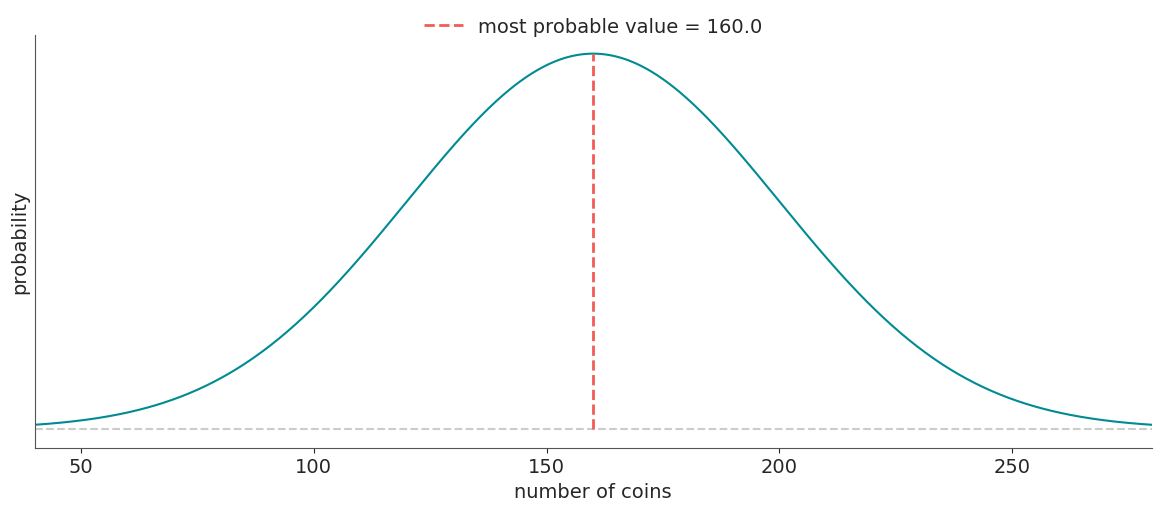

In [3]:
ax = dist.plot_pdf(legend=None)
ax.set(xlim=x[[0, -1]], xlabel='number of coins', ylabel='probability')

mode = dist.mode()
ax.vlines(mode, 0, dist.pdf(mode), colors='C2', ls='--', lw=2, label=f'most probable value = {mode}')
plt.legend(bbox_to_anchor=(0.5, 1.02), loc='center');

Alternatively students might want to maximize the expected utility of the number coins. Assume that utility of the money is linear.

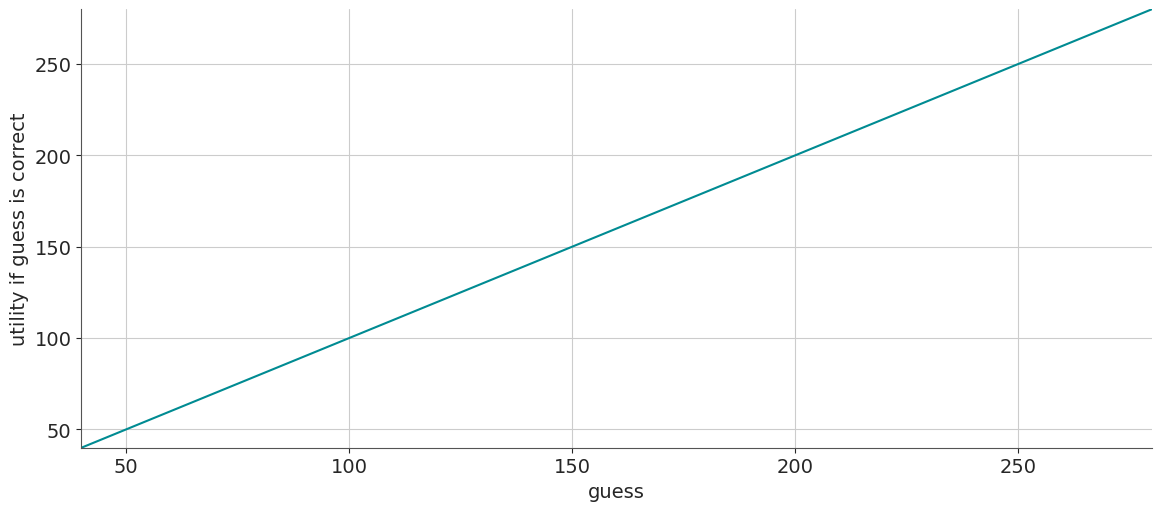

In [4]:
# Plot the utility
plt.plot(x, x)
plt.ylabel('utility if guess is correct')
plt.xlabel('guess')
plt.xlim([x[0], x[-1]])
plt.ylim([x[0], x[-1]]);
plt.grid(True)

If students guess value $a$, given their estimate of the uncertainty, probability that they get $a$ coins is $p(a)$, and expected utility is $a * p(a)$.

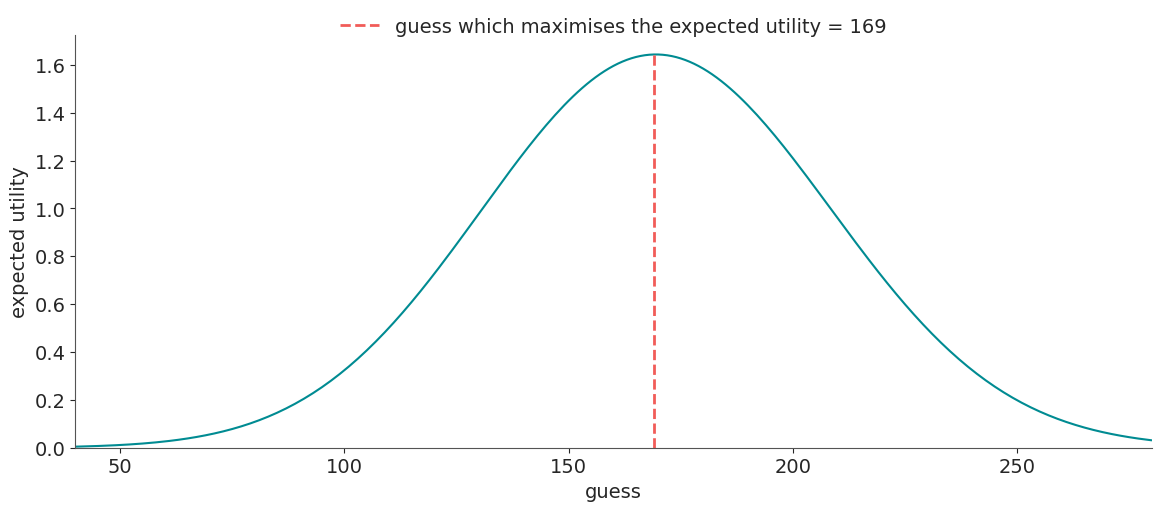

In [5]:
_, ax = plt.subplots()

ax.plot(x, xpx)
ax.set(xlim=x[[0, -1]], ylim=0, xlabel='guess', ylabel='expected utility')

mi = np.argmax(xpx)
meu = xpx[mi]
meux = x[mi]
ax.vlines(meux, 0, meu, colors='C2', ls='--', lw=2, label=f'guess which maximises the expected utility = {meux}')

plt.legend(bbox_to_anchor=(0.5, 1.02), loc='center');